In [2]:
import numpy as np
import pandas as pd
import os


In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784",version =1,cache=True, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]


In [150]:
X.shape


(70000, 784)

In [143]:
y.shape

(70000,)

In [144]:
28*28

784

In [153]:
some_digit = X[36000]


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt


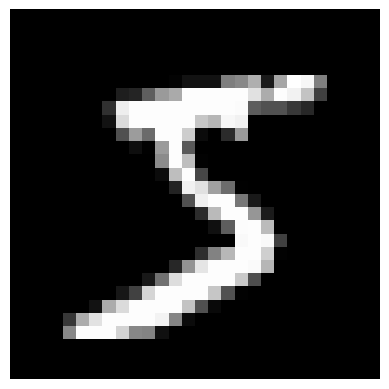

In [9]:
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap="gray")
plt.axis("off")
plt.show()

In [10]:
type(y[0])

str

In [11]:
y = y.astype(np.uint8)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

# Binary classification

In [13]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)


In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([some_digit])

c:\Users\sunqu\miniconda3\envs\hands_on_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3 ,scoring="accuracy")


array([0.95954286, 0.96257143, 0.95622857])

In [19]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3 ,scoring="accuracy")


array([0.90754286, 0.91165714, 0.91102857])

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv =3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[47055,   724],
       [ 1405,  3316]], dtype=int64)

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [22]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

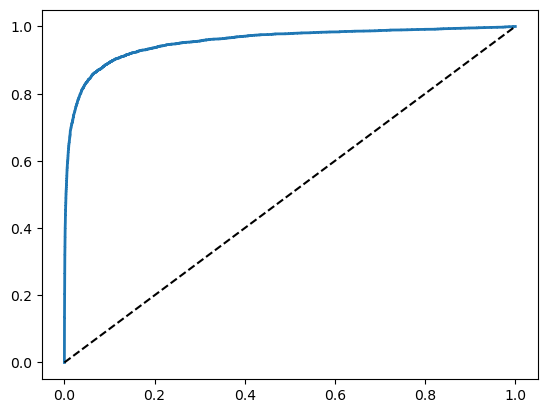

In [23]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    [...]

plot_roc_curve(fpr,tpr)
plt.show()

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9548078673086816

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv =3, method="predict_proba")

In [26]:
y_scores_forest = y_probas_forest[:,1]

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

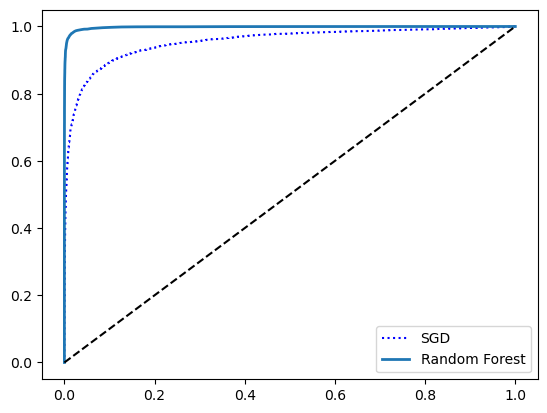

In [27]:
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [28]:
roc_auc_score(y_train_5, y_scores_forest)

0.9981678003024401

### This is actually 45 OneVsOne SVMs

In [30]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

c:\Users\sunqu\miniconda3\envs\hands_on_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [31]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

c:\Users\sunqu\miniconda3\envs\hands_on_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.724086  ,  2.73634749,  7.26068897,  8.30686201, -0.31193387,
         9.31245569,  1.71381805,  2.77631203,  6.19572878,  4.92425764]])

### Let's try OneVsRest


In [32]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

c:\Users\sunqu\miniconda3\envs\hands_on_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\sunqu\miniconda3\envs\hands_on_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\sunqu\miniconda3\envs\hands_on_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\sunqu\miniconda3\envs\hands_on_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\sunqu\miniconda3\envs\hands_on_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\sunqu\miniconda3\envs\hands_on_ml\lib\site-packages\skle

array([5], dtype=uint8)

In [33]:
ovr_clf.estimators_

[SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC(), SVC()]

In [35]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [36]:
sgd_clf.decision_function([some_digit])

c:\Users\sunqu\miniconda3\envs\hands_on_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-20375.36738692, -57938.76492308, -11105.93467726,
          -767.16003846, -25794.94215483,   -184.79353521,
        -28391.68279614, -22350.58848376, -10103.01971861,
         -9517.87903275]])

In [37]:
cross_val_score(sgd_clf,X_train, y_train, cv=3, scoring = "accuracy")

array([0.86754286, 0.88417143, 0.86028571])

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled,y_train,cv=3,scoring="accuracy")

c:\Users\sunqu\miniconda3\envs\hands_on_ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\sunqu\miniconda3\envs\hands_on_ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.90674286, 0.90228571, 0.90851429])

In [53]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_train_pred)
conf_matrix

c:\Users\sunqu\miniconda3\envs\hands_on_ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\sunqu\miniconda3\envs\hands_on_ml\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[4852,    0,   12,    6,    6,   49,   36,    4,  147,    1],
       [   1, 5652,   35,   19,    4,   42,    7,    7,  150,   12],
       [  17,   25, 4600,   75,   69,   27,   58,   38,  260,   11],
       [  24,   18,   99, 4663,    3,  197,   16,   39,  263,   65],
       [  11,   11,   49,   13, 4581,   11,   30,   21,  199,  161],
       [  25,   18,   26,  156,   49, 3945,   77,   13,  351,   61],
       [  27,   15,   42,    3,   39,   82, 4844,    8,   94,    0],
       [  19,   13,   58,   21,   38,   11,    4, 5034,  109,  199],
       [  12,   53,   41,   90,    4,  113,   31,    9, 4793,   43],
       [  15,   23,   28,   55,  105,   32,    0,  155,  228, 4593]],
      dtype=int64)

In [103]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)



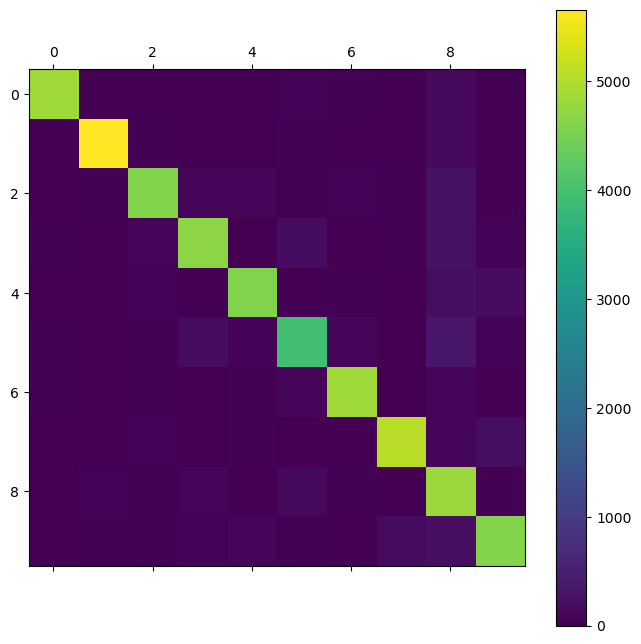

In [104]:
plot_confusion_matrix(conf_matrix)

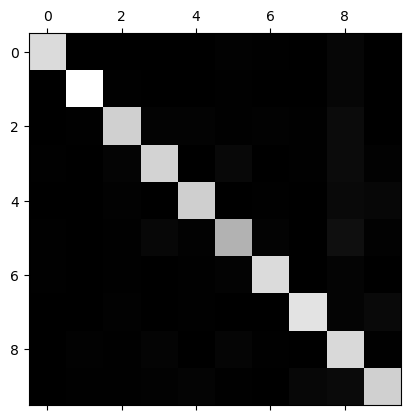

In [54]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()


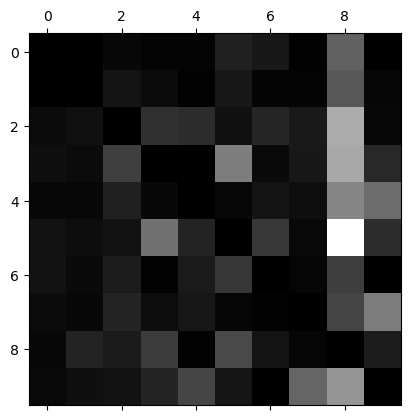

In [55]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)

norm_conf_mx = conf_matrix / row_sums

np.fill_diagonal(norm_conf_mx,0)

plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()


In [68]:
cl_a, cl_b = 3, 5


pandas.core.series.Series

In [89]:

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]


In [94]:
def plot_digits(instances, images_per_row=10, **options):
    size=28
    image_pre_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances)-1) // images_per_row+1
    row_images = []
    n_empty = n_rows*images_per_row - len(instances)

    images.append(np.zeros((size,size*n_empty)))
    for row in range(n_rows):
        rimages = images[(row*images_per_row):(row+1)*images_per_row]
        row_images.append(np.concatenate(rimages,axis=1))
    image = np.concatenate(row_images,axis=0)
    plt.imshow(image,cmap = mpl.cm.binary,**options)
    plt.axis("off")

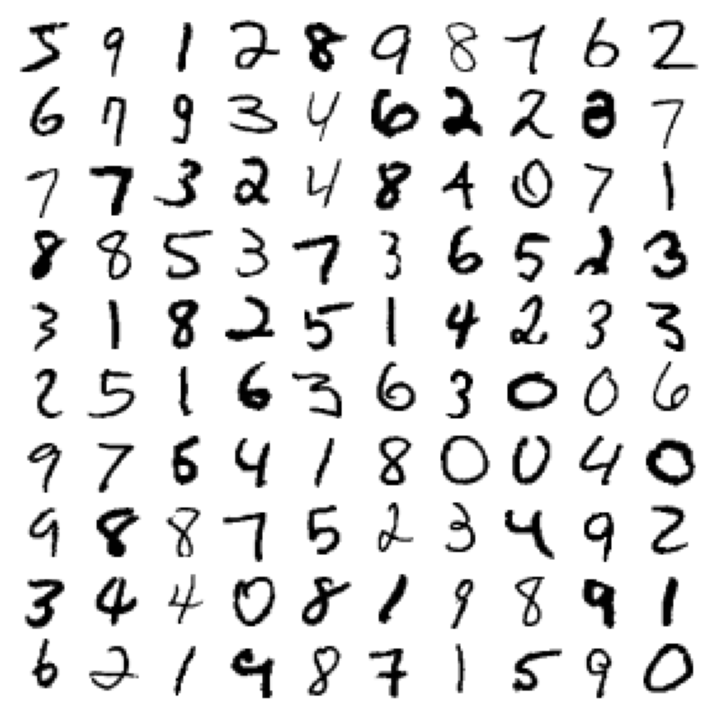

In [95]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()


In [88]:
type(X_aa[:25])

pandas.core.frame.DataFrame

In [99]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)



In [100]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=600):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


Saving figure error_analysis_digits_plot


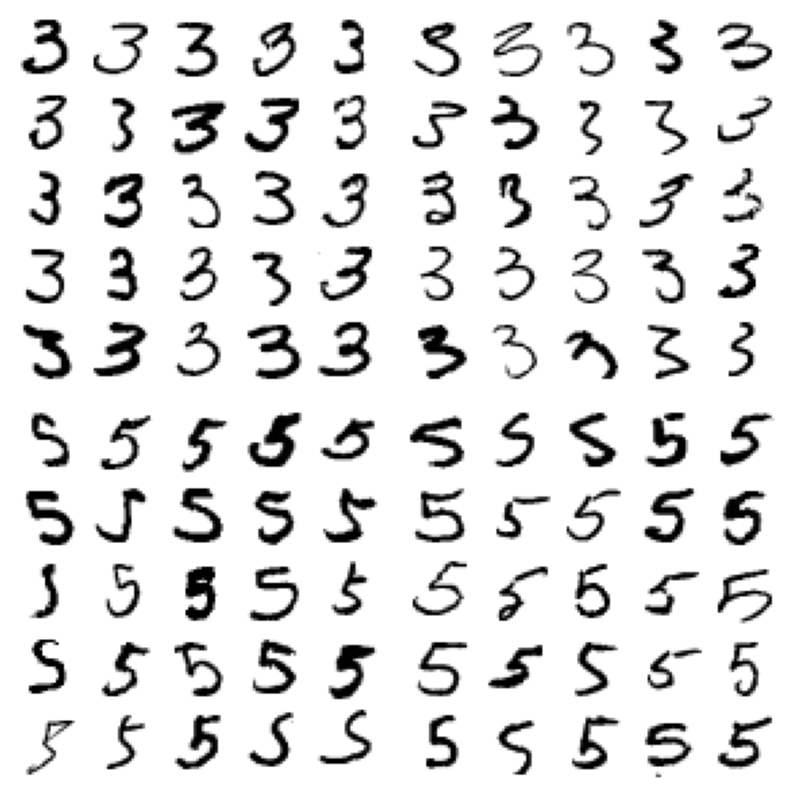

In [158]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(np.asarray(X_aa[:25]), images_per_row=5)
plt.subplot(222); plot_digits(np.asarray(X_ab[:25]), images_per_row=5)
plt.subplot(223); plot_digits(np.asarray(X_ba[:25]), images_per_row=5)
plt.subplot(224); plot_digits(np.asarray(X_bb[:25]), images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()


In [7]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train>=7)
y_train_odd = (y_train%2==1)

y_multilabel = np.c_[y_train_large,y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

TypeError: '>=' not supported between instances of 'str' and 'int'

In [108]:
knn_clf.predict([some_digit])

c:\Users\sunqu\miniconda3\envs\hands_on_ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [110]:
from sklearn.metrics import f1_score

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv =3)

f1_score(y_multilabel,y_train_knn_pred, average="macro")

0.9773569443274988

In [155]:
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test


ValueError: cannot reshape array of size 1 into shape (28,28)

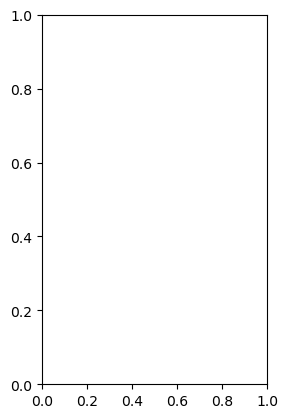

In [159]:
some_index = 5500
plt.subplot(121); plot_digits(X_test_mod[some_index])
plt.subplot(122); plot_digits(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()


In [160]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

In [162]:
clean_digit=knn_clf.predict([X_test_mod[some_index]])

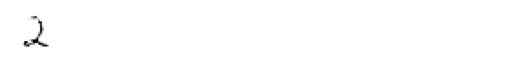

In [163]:
plot_digits(clean_digit)

In [8]:
from tabnanny import verbose
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

param_grid = [{'weights':["uniform", "distance"], 'n_neighbors':[3,4,5]}]

knn_clf = KNeighborsClassifier()

grid_search_clf = GridSearchCV(knn_clf, param_grid, cv = 5, verbose=3, n_jobs=11)

grid_search_clf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
